In [1]:
%matplotlib inline
import sys
import os
import os.path
import subprocess
import numpy as np

import tables as tb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval
from astropy.table import Table, vstack, Column
from astropy.io import ascii

import glob

In [2]:
ff = glob.glob("/work/04287/mxhf/maverick/hetdex/cubes*1.images.txt")

In [3]:
tt = []
for f in ff:
    h,t = os.path.split(f)
    shotid = t.replace("cubes","").replace(".images.txt","")
    t = ascii.read(f)
    date,shotnum = shotid.split("v")
    t.add_column(Column([shotid]*len(t)), 0, name="shotid")
    t.add_column(Column([int(date)]*len(t)), 1, name="date")
    t.add_column(Column([int(shotnum)]*len(t)), 2, name="shotnum")
    
    
    tt.append(t)
    
tt = vstack(tt)

In [4]:
hwids = []
for r in tt:
    hwids.append( "{}-{:03d}-{:03d}-{:03d}".format(r["contid"].format("", "-"),r["ifuid"], r["ifuslot"], r["specid"]))

In [5]:
tt.add_column(Column(hwids, name="hwids") )

In [6]:
uhwids = np.unique(hwids)

Text(0, 0.5, 'ifu slot')

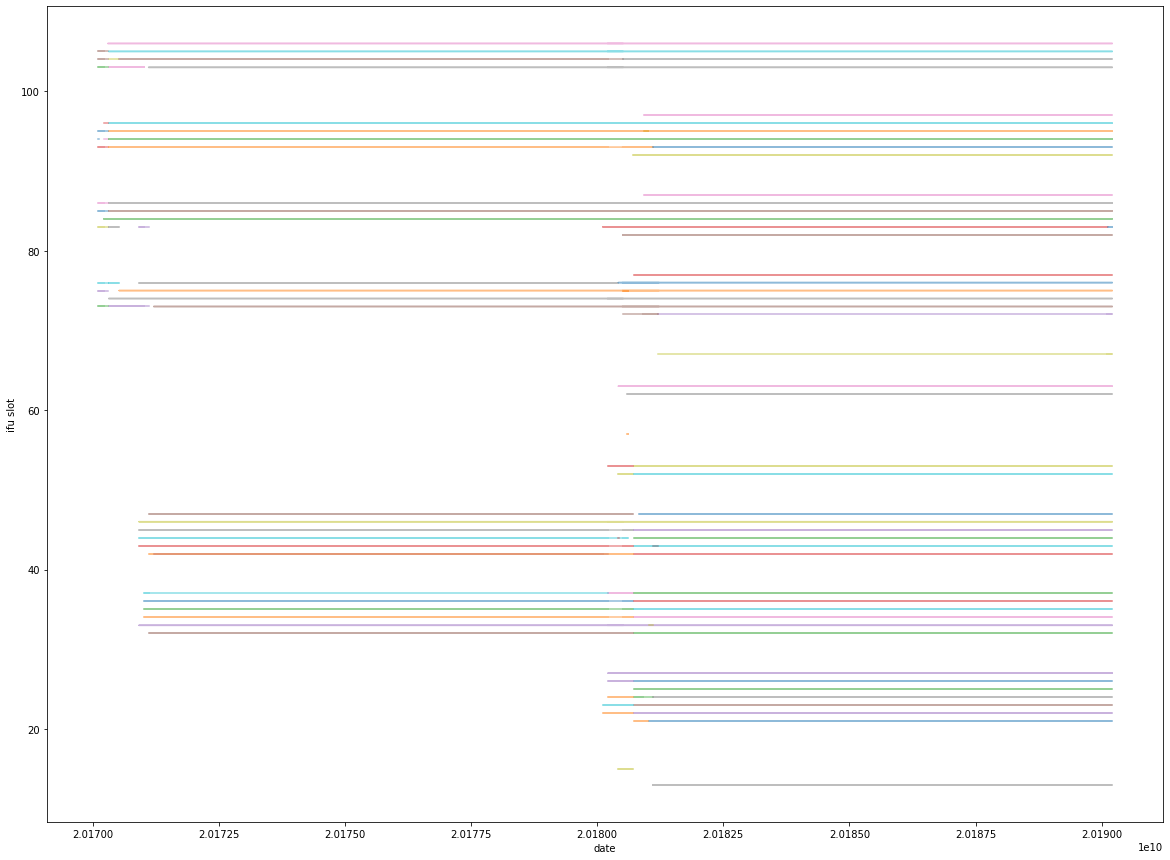

In [7]:
f = plt.figure(figsize=[20,15])
ax = plt.subplot(111)


for hwid in uhwids:
    ii = tt["hwids"] == hwid
    #plt.plot(tt["date"][ii], tt["ifuslot"][ii])
    plt.plot(tt["date"][ii]*1000 + tt["shotnum"][ii], tt["ifuslot"][ii], alpha=.5)
    
plt.xlabel("date")
plt.ylabel("ifu slot")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)




In [8]:
np.max( tt["date"] )

20190209

In [9]:
np.min( tt["ifuslot"] )

13

In [10]:
def get_hwconfig(shotid, ifuslot):
    # for a shot and a ifuslot find the hawrdware configuration (= hwid)
    jj = tt["shotid"] == shotid
    jj *= tt["ifuslot"] == ifuslot
    
    uhwids = np.unique(tt[jj]["hwids"])
    if not len(uhwids) == 1:
        print("Error could not uniquely identify hardware configuration.")
        return
    return uhwids[0]

def get_shots_for_hwconfig(hwid):
    # now find *all* shots that had that hwardware configuration
    jj = tt["hwids"] == hwid
    shotids = np.unique( tt["shotid"][jj] )
    return Table([shotids])

hwid  = get_hwconfig("20181102v011", 13) 
shotids = get_shots_for_hwconfig(hwid)

In [14]:
ushotids = np.unique(tt["shotid"])
for shotid in ushotids:
    jj = tt["shotid"] == shotid
    uifuslots = np.unique(tt["ifuslot"][jj])
    for ifuslot in uifuslots:
        hwid  = get_hwconfig(shotid, ifuslot) 
        shotids = get_shots_for_hwconfig(hwid)
        outfilename = "/work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_{}_ifu{:03d}.txt".format(shotid, ifuslot)
        shotids.write(outfilename, format='ascii.no_header')
        print("Wrote {}".format(outfilename))
        
        outfilename = "/work/04287/mxhf/maverick/hetdex/cubes/shotlist_{}_ifu{:03d}.txt".format(shotid, ifuslot)
        with open(outfilename, 'w') as f:
            f.write(shotid)
        #np.savetxt("/work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_{}_{}.txt".format(shotid, ifuslot), shotids, encoding='latin1')

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170105v011_ifu105.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170327v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170328v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170328v011_ifu074.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v021_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v031_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v031_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v031_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20170922v031_ifu045.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171019v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171023v021_ifu033.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171112v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171117v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171117v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171117v011_ifu035.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171216v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171216v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171216v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171216v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171216v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171216v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171216v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171220v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171220v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171220v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171220v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20171220v011_ifu036.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180113v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180115v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180115v011_ifu023.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180209v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180210v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180210v011_ifu032.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180213v011_ifu094.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180219v011_ifu093.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180223v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180223v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180223v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180223v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180309v001_ifu035.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180317v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180317v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180321v011_ifu037.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180411v011_ifu083.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180412v021_ifu083.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180415v021_ifu085.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180419v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180419v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180419v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180419v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180419v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180419v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180420v011_ifu015.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180420v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180420v011_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180420v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180420v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180420v011_ifu027.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180424v021_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180505v011_ifu015.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180505v011_ifu022.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180507v011_ifu082.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180512v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu015.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180513v011_ifu036.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180515v011_ifu106.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180517v011_ifu082.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180519v011_ifu044.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180601v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180612v021_ifu015.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180612v021_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180612v021_ifu023.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu057.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180619v011_ifu076.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180717v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180728v011_ifu035.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu077.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180801v021_ifu084.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180807v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180808v011_ifu035.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu077.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu082.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180822v021_ifu086.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180905v031_ifu035.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180911v011_ifu077.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v021_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v021_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180912v021_ifu023.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20180913v021_ifu053.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu077.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu082.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu087.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu097.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181001v011_ifu103.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181011v011_ifu046.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu077.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu082.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu087.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181030v011_ifu093.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu097.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181106v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181107v011_ifu013.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181107v011_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181107v011_ifu022.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181108v021_ifu045.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu077.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu082.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181115v011_ifu084.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu087.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu097.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181120v011_ifu106.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181128v011_ifu043.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181130v011_ifu076.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu087.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu097.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181202v021_ifu104.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu013.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181204v021_ifu035.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181210v011_ifu063.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu067.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu073.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu077.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu082.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181215v031_ifu084.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu087.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu097.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20181228v011_ifu103.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v011_ifu105.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu013.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190104v021_ifu027.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190105v021_ifu044.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190108v011_ifu062.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu087.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu093.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu094.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu095.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu096.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu097.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v011_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190112v031_ifu013.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190117v021_ifu103.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190117v021_ifu104.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190117v021_ifu106.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu013.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu021.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu022.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu023.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190125v011_ifu032.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu024.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu025.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu026.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu027.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu032.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu033.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu034.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu035.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu036.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu037.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu042.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190202v011_ifu043.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu043.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu044.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu045.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu046.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu047.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu052.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu053.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu062.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu063.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu067.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu072.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190204v011_ifu073.txt
Wrote /work/0428

Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu074.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu075.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu076.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu077.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu082.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu083.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu084.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu085.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu086.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu087.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu092.txt
Wrote /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20190208v021_ifu093.txt
Wrote /work/0428

In [61]:
! head hdr1_instrument_ids.tab.tab 

shotid ifuslot specid ifuid contid
20170202006 073 008 001 "S/N 0012"
20170202006 075 013 004 "S/N 0027"
20170202006 076 016 014 "S/N 0028"
20170202006 083 017 015 "S/N 0036"
20170202006 084 020 019 "S/N 0039"
20170202006 085 024 022 "S/N 0041"
20170202006 086 025 023 "S/N 0053"
20170202006 093 027 026 "S/N 0069"
20170202006 094 032 028 "S/N 0077"


In [15]:
!mkdir /work/04287/mxhf/maverick/hetdex/cubes/shotlists


In [16]:
!mv /work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_20* /work/04287/mxhf/maverick/hetdex/cubes/shotlists/.

In [17]:
!mv /work/04287/mxhf/maverick/hetdex/cubes/shotlist_20* /work/04287/mxhf/maverick/hetdex/cubes/shotlists/.